# Behavioural analysis

I follow Melara, Wang, Vu, & Proctor (2008) as reference.

Variables:
- vp: participant
- ss: session
- bl: block
- tr: trial
- cond: condition
- real_soa: millisecond between both stimuli. Should be 100, but we allow +- 2. Drop all the rest.
- corresp: left button 1, right button 3
- respac: correct (1) or incorrect (0)
- rt: reaction time
- outlier: 0 if response lies between 100 and 700 ms

In [3]:
import os
os.chdir('../data')

In [20]:
import scipy
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM

In [52]:
reaction_times = pd.read_csv("input/behavioural/MeanRTs.csv")
error_rates = pd.read_csv("input/behavioural/ArsErrorRates.csv")

**Conditions**

We will use a code like "CN" or "IC".
- Stroop - Simon: first and second character respectively.
- C: consistent (same colour, same position as the pressed button).
- N: neutral
- I: inconsistent.

Example: CN is consistent stroop and neutral Simon.

In [53]:
reaction_times.head()

,subject,CC,CN,CI,NC,NN,NI,IC,IN,II
0,1,370.741497,352.993243,392.828767,392.082192,374.272727,393.857143,388.591837,368.021429,403.600000
1,2,411.244755,413.094891,490.110236,427.992701,426.248175,495.833333,449.589552,436.270677,493.960000
2,3,390.233577,370.014925,402.106870,386.125874,351.845070,411.912409,390.640288,358.654930,404.401460
3,4,340.777778,345.400000,384.114035,358.549296,349.512397,388.313043,361.362963,351.144068,393.261261
4,5,358.657718,356.958621,418.195804,376.979452,355.134752,413.185714,368.698630,370.881944,418.569343


In my study, I am interested in the Simon effect, so I will need N Stroop and C/I Simon.

In [58]:
# keep only columns relevant to the pure Simon effect
columns = ["subject", "NC", "NI"]
reaction_times = reaction_times[columns]
error_rates = error_rates[columns]

## Plot the data

In [59]:
def confidence_interval_bar(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    error_bar = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return error_bar

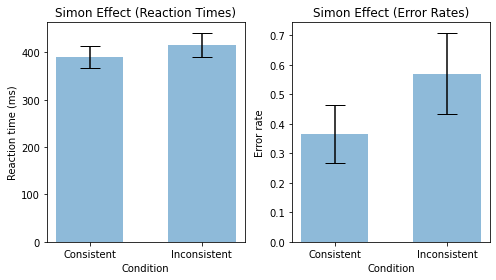

In [72]:
# Build the plot
figure, axis = plt.subplots(1, 2, figsize=(7, 4))

# Reaction times
consistent_mean = np.mean(reaction_times["NC"])
inconsistent_mean = np.mean(reaction_times["NI"])

consistent_std = np.std(reaction_times["NC"])
inconsistent_std = np.std(reaction_times["NI"])

conditions = ["Consistent", "Inconsistent"]
x_pos = np.arange(len(conditions))
CTEs = [consistent_mean, inconsistent_mean]
error = [confidence_interval_bar(reaction_times["NC"]), confidence_interval_bar(reaction_times["NI"])]

axis[0].bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.6)
axis[0].set_xlabel('Condition')
axis[0].set_ylabel('Reaction time (ms)')
axis[0].set_xticks(x_pos)
axis[0].set_xticklabels(conditions)
axis[0].set_title('Simon Effect (Reaction Times)')

# Error rates
consistent_mean = np.mean(error_rates["NC"])
inconsistent_mean = np.mean(error_rates["NI"])

consistent_std = np.std(error_rates["NC"])
inconsistent_std = np.std(error_rates["NI"])

conditions = ["Consistent", "Inconsistent"]
x_pos = np.arange(len(conditions))
CTEs = [consistent_mean, inconsistent_mean]
error = [confidence_interval_bar(error_rates["NC"]), confidence_interval_bar(error_rates["NI"])]

axis[1].bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, width=0.6)
axis[1].set_xlabel('Condition')
axis[1].set_ylabel('Error rate')
axis[1].set_xticks(x_pos)
axis[1].set_xticklabels(conditions)
axis[1].set_title('Simon Effect (Error Rates)')

plt.tight_layout()
plt.show()

## Repeated measures ANOVA

In [46]:
# unpivot dataframes
reaction_times = pd.melt(reaction_times, id_vars=["subject"], value_vars=["NC", "NI"])
error_rates = pd.melt(error_rates, id_vars=["subject"], value_vars=["NC", "NI"])
reaction_times.sample(5)

,subject,variable,value
4,5,NC,376.979452
18,8,NI,375.634328
16,6,NI,448.746154
15,5,NI,413.185714
17,7,NI,462.722628


In [12]:
print("Reaction times:")
print(AnovaRM(data=reaction_times, depvar="value", subject="subject", within=['variable']).fit())
print("Error rates:")
print(AnovaRM(data=error_rates, depvar="value", subject="subject", within=['variable']).fit())

Reaction times:
                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable 21.8033 1.0000 10.0000 0.0009

Error rates:
                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
variable 14.5310 1.0000 10.0000 0.0034

